# 0 Functions & Data

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,cohen_kappa_score
import statistics
def Metric_list(func,ls):
    result=[]
    for i in ls:
        result.append(func(gold,i))
    return result


def Metrics_Std(ls):
    PRFAK=[]
    PRFAK.append(statistics.stdev(Metric_list(precision_score,ls)))
    PRFAK.append(statistics.stdev(Metric_list(recall_score,ls)))
    PRFAK.append(statistics.stdev(Metric_list(f1_score,ls)))
    PRFAK.append(statistics.stdev(Metric_list(accuracy_score,ls)))
    PRFAK.append(statistics.stdev(Metric_list(cohen_kappa_score,ls)))
    return PRFAK
# print(Metrics_Std(gptls))

In [9]:
import json
with open('Data/Het/HeteroLabel.json', 'r') as file:
    gold = json.load(file)
#######################################################
with open('Data/Het/Claude-1.json', 'r') as file:
    cld1 = json.load(file)
with open('Data/Het/Claude-2.json', 'r') as file:
    cld2 = json.load(file)
with open('Data/Het/Claude-3.json', 'r') as file:
    cld3 = json.load(file)
with open('Data/Het/Claude-4.json', 'r') as file:
    cld4 = json.load(file)
with open('Data/Het/Claude-5.json', 'r') as file:
    cld5 = json.load(file)
with open('Data/Het/Claude-6.json', 'r') as file:
    cld6 = json.load(file)
with open('Data/Het/Claude-7.json', 'r') as file:
    cld7 = json.load(file)
with open('Data/Het/Claude-8.json', 'r') as file:
    cld8 = json.load(file)
with open('Data/Het/Claude-9.json', 'r') as file:
    cld9 = json.load(file)
with open('Data/Het/Claude-10.json', 'r') as file:
    cld10 = json.load(file)
##############################################################
with open('Data/Het/Gemini-1.json', 'r') as file:
    gem1 = json.load(file)
with open('Data/Het/Gemini-2.json', 'r') as file:
    gem2 = json.load(file)
with open('Data/Het/Gemini-3.json', 'r') as file:
    gem3 = json.load(file)
with open('Data/Het/Gemini-4.json', 'r') as file:
    gem4 = json.load(file)
with open('Data/Het/Gemini-5.json', 'r') as file:
    gem5 = json.load(file)
with open('Data/Het/Gemini-6.json', 'r') as file:
    gem6 = json.load(file)
with open('Data/Het/Gemini-7.json', 'r') as file:
    gem7 = json.load(file)
with open('Data/Het/Gemini-8.json', 'r') as file:
    gem8 = json.load(file)
with open('Data/Het/Gemini-9.json', 'r') as file:
    gem9 = json.load(file)
with open('Data/Het/Gemini-10.json', 'r') as file:
    gem10 = json.load(file)
#####################################################################
with open('Data/Het/GPT3-1.json', 'r') as file:
    GPT3 = json.load(file)
####################################################
with open('Data/Het/GPT4-1.json', 'r') as file:
    gpt1 = json.load(file)
with open('Data/Het/GPT4-2.json', 'r') as file:
    gpt2 = json.load(file)
with open('Data/Het/GPT4-3.json', 'r') as file:
    gpt3 = json.load(file)
with open('Data/Het/GPT4-4.json', 'r') as file:
    gpt4 = json.load(file)
with open('Data/Het/GPT4-5.json', 'r') as file:
    gpt5 = json.load(file)
with open('Data/Het/GPT4-6.json', 'r') as file:
    gpt6 = json.load(file)
with open('Data/Het/GPT4-7.json', 'r') as file:
    gpt7 = json.load(file)
with open('Data/Het/GPT4-8.json', 'r') as file:
    gpt8 = json.load(file)
with open('Data/Het/GPT4-9.json', 'r') as file:
    gpt9 = json.load(file)
with open('Data/Het/GPT4-10.json', 'r') as file:
    gpt10 = json.load(file)
###################################################################
gptls=[gpt1,gpt2,gpt3,gpt4,gpt5,gpt6,gpt7,gpt8,gpt9,gpt10]
cldls=[cld1,cld2,cld3,cld4,cld5,cld6,cld7,cld8,cld9,cld10]
gemls=[gem1,gem2,gem3,gem4,gem5,gem6,gem7,gem8,gem9,gem10]

# 1 Standard Deviation of Performance Metrics for (Table 15,16)

In [10]:
import pandas as pd
import numpy as np

def format_data(data):
    return [f"{value * 100:.3f}" for value in data]

# Assuming gpt1s, cld1s, and gem1s are your input lists
gpt4_data   = Metrics_Std(gptls)
claude_data = Metrics_Std(cldls)
gemini_data = Metrics_Std(gemls)

# Create a DataFrame
df = pd.DataFrame({
    'LLM': ['GPT-4', 'Claude', 'Gemini'],
    'StdP': format_data([gpt4_data[0], claude_data[0], gemini_data[0]]),
    'StdR': format_data([gpt4_data[1], claude_data[1], gemini_data[1]]),
    'StdF1': format_data([gpt4_data[2], claude_data[2], gemini_data[2]]),
    'StdA': format_data([gpt4_data[3], claude_data[3], gemini_data[3]]),
    'StdK': format_data([gpt4_data[4], claude_data[4], gemini_data[4]])
})

# Set 'LLM' as index
df.set_index('LLM', inplace=True)

print(df.to_string())

         StdP   StdR  StdF1   StdA   StdK
LLM                                      
GPT-4   0.279  0.811  0.524  0.658  1.350
Claude  0.177  1.402  0.864  0.955  1.670
Gemini  0.324  1.002  0.618  0.692  1.234


In [11]:
from sklearn.metrics import cohen_kappa_score
import numpy as np

def calculate_kappa_metrics(predictions, gold):
    kappa_values = [cohen_kappa_score(pred, gold) for pred in predictions]
    max_kappa = max(kappa_values)
    min_kappa = min(kappa_values)
    avg_kappa = np.mean(kappa_values)
    return max_kappa, min_kappa, avg_kappa

def format_float(value):
    return f"{value:.3f}"

# Calculate kappa metrics for each model
gpt_max, gpt_min, gpt_avg = calculate_kappa_metrics(gptls, gold)
cld_max, cld_min, cld_avg = calculate_kappa_metrics(cldls, gold)
gem_max, gem_min, gem_avg = calculate_kappa_metrics(gemls, gold)

# Print the table
print("   Individual Agreement")
print("LLM     Max    Min    Avg")
print(f"GPT-4  {format_float(gpt_max)}  {format_float(gpt_min)}  {format_float(gpt_avg)}")
print(f"Claude {format_float(cld_max)}  {format_float(cld_min)}  {format_float(cld_avg)}")
print(f"Gemini {format_float(gem_max)}  {format_float(gem_min)}  {format_float(gem_avg)}")

   Individual Agreement
LLM     Max    Min    Avg
GPT-4  0.747  0.709  0.734
Claude 0.669  0.616  0.651
Gemini 0.643  0.604  0.622


# 2 Performance Metrics for Heterographic Pun Detection(Figure 2)

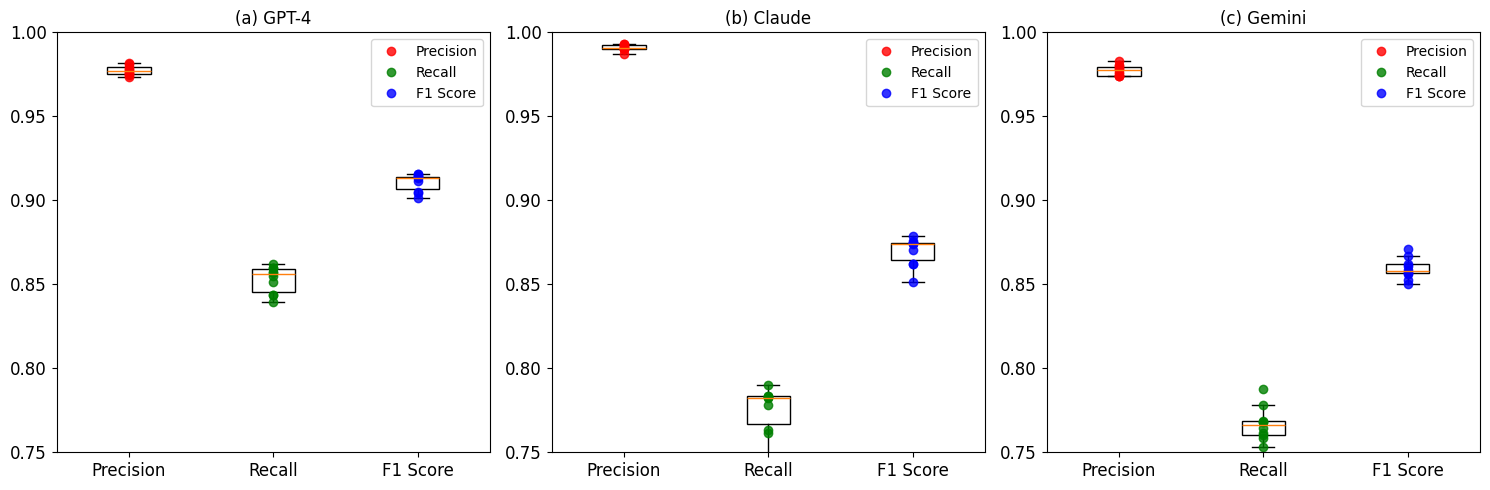

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Data
Gemini = [[0.97374, 0.75846, 0.85272], [0.98071, 0.76003, 0.85638], [0.97896, 0.76869, 0.86117], [0.97976, 0.76161, 0.85702], [0.97824, 0.77813, 0.86678], [0.98288, 0.7679, 0.86219], [0.97374, 0.78757, 0.87081], [0.97492, 0.76475, 0.85714], [0.97405, 0.7679, 0.85878], [0.97653, 0.75295, 0.85029]]
GPT4 = [[0.97455, 0.84343, 0.90426], [0.98096, 0.8513, 0.91154], [0.97756, 0.85681, 0.91321], [0.98193, 0.85523, 0.91421], [0.97939, 0.85995, 0.91579], [0.97596, 0.86231, 0.91562], [0.97632, 0.84343, 0.90502], [0.97354, 0.8395, 0.90156], [0.97846, 0.85759, 0.91405], [0.97502, 0.85995, 0.91388]]
Claude = [[0.99282, 0.76161, 0.86198], [0.99266, 0.74508, 0.85124], [0.99081, 0.76318, 0.86222], [0.98703, 0.77813, 0.87022], [0.99104, 0.78285, 0.87473], [0.99005, 0.78285, 0.87434], [0.99006, 0.78363, 0.87484], [0.99014, 0.78993, 0.87877], [0.99103, 0.78206, 0.87423], [0.99302, 0.78363, 0.87599]]

# Separate the data into precision, recall, and F1 score lists for each model
Gemini_p = [data[0] for data in Gemini]
Gemini_r = [data[1] for data in Gemini] 
Gemini_f1 = [data[2] for data in Gemini]

GPT4_p = [data[0] for data in GPT4]
GPT4_r = [data[1] for data in GPT4]
GPT4_f1 = [data[2] for data in GPT4]

Claude_p = [data[0] for data in Claude]
Claude_r = [data[1] for data in Claude]
Claude_f1 = [data[2] for data in Claude]

# Create three subplots for each model
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Box plot for GPT-4
bp1 = ax1.boxplot([GPT4_p, GPT4_r, GPT4_f1], labels=['Precision', 'Recall', 'F1 Score'], showfliers=False, patch_artist=True)
for box in bp1['boxes']:
    box.set(facecolor='none')
ax1.plot([1]*len(GPT4_p), GPT4_p, 'ro', alpha=0.8, label='Precision')
ax1.plot([2]*len(GPT4_r), GPT4_r, 'go', alpha=0.8, label='Recall')
ax1.plot([3]*len(GPT4_f1), GPT4_f1, 'bo', alpha=0.8, label='F1 Score')
ax1.set_title('(a) GPT-4')
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(loc='upper right')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_ylim(0.75, 1)

# Box plot for Claude
bp2 = ax2.boxplot([Claude_p, Claude_r, Claude_f1], labels=['Precision', 'Recall', 'F1 Score'], showfliers=False, patch_artist=True)
for box in bp2['boxes']:
    box.set(facecolor='none')
ax2.plot([1]*len(Claude_p), Claude_p, 'ro', alpha=0.8, label='Precision')
ax2.plot([2]*len(Claude_r), Claude_r, 'go', alpha=0.8, label='Recall')
ax2.plot([3]*len(Claude_f1), Claude_f1, 'bo', alpha=0.8, label='F1 Score')
ax2.set_title('(b) Claude')
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.legend(loc='upper right')
ax2.set_ylim(0.75, 1)

# Box plot for Gemini
bp3 = ax3.boxplot([Gemini_p, Gemini_r, Gemini_f1], labels=['Precision', 'Recall', 'F1 Score'], showfliers=False, patch_artist=True)
for box in bp3['boxes']:
    box.set(facecolor='none')
ax3.plot([1]*len(Gemini_p), Gemini_p, 'ro', alpha=0.8, label='Precision')
ax3.plot([2]*len(Gemini_r), Gemini_r, 'go', alpha=0.8, label='Recall')
ax3.plot([3]*len(Gemini_f1), Gemini_f1, 'bo', alpha=0.8, label='F1 Score')
ax3.set_title('(c) Gemini')
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.legend(loc='upper right')
ax3.set_ylim(0.75, 1)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# 3 Intra and Inter-Model Agreement for LLMs（Figure 3）

In [13]:
import numpy as np
from sklearn.metrics import cohen_kappa_score

data = gptls + cldls + gemls

# Initialize matrix to store Cohen's kappa scores
num_lists = len(data)
kappa_matrix = np.zeros((num_lists, num_lists))

# Calculate Cohen's kappa for each pair
for i in range(num_lists):
    for j in range(num_lists):
        kappa_matrix[i, j] = cohen_kappa_score(data[i], data[j])

# Calculate inner and cross kappa scores
def calculate_inner_kappa(matrix, start, end):
    # Extract the submatrix for the group
    submatrix = matrix[start:end, start:end]
    # Calculate the upper triangular indices excluding the diagonal
    triu_indices = np.triu_indices_from(submatrix, k=1)
    # Extract the upper triangular values
    triu_values = submatrix[triu_indices]
    # Calculate and return the average
    return np.mean(triu_values)

def calculate_cross_kappa(matrix, start1, end1, start2, end2):
    # Extract the submatrix for the groups combination
    submatrix = matrix[start1:end1, start2:end2]
    # Flatten the submatrix to get all pairwise kappa scores
    values = submatrix.flatten()
    # Calculate and return the average
    return np.mean(values)

# Indices for each group
gpt_start, gpt_end = 0, 10
claude_start, claude_end = 10, 20
gemini_start, gemini_end = 20, 30

# Calculate inner kappa scores
inner_gpt_kappa = calculate_inner_kappa(kappa_matrix, gpt_start, gpt_end)
inner_claude_kappa = calculate_inner_kappa(kappa_matrix, claude_start, claude_end)
inner_gemini_kappa = calculate_inner_kappa(kappa_matrix, gemini_start, gemini_end)

# Calculate cross kappa scores
cross_gpt_claude_kappa = calculate_cross_kappa(kappa_matrix, gpt_start, gpt_end, claude_start, claude_end)
cross_gpt_gemini_kappa = calculate_cross_kappa(kappa_matrix, gpt_start, gpt_end, gemini_start, gemini_end)
cross_claude_gemini_kappa = calculate_cross_kappa(kappa_matrix, claude_start, claude_end, gemini_start, gemini_end)

# Print results
print("Inner GPT Kappa Score:", inner_gpt_kappa)
print("Inner Claude Kappa Score:", inner_claude_kappa)
print("Inner Gemini Kappa Score:", inner_gemini_kappa)
print("Cross GPT-Claude Kappa Score:", cross_gpt_claude_kappa)
print("Cross GPT-Gemini Kappa Score:", cross_gpt_gemini_kappa)
print("Cross Claude-Gemini Kappa Score:", cross_claude_gemini_kappa)

Inner GPT Kappa Score: 0.7982120011558412
Inner Claude Kappa Score: 0.7681712084117063
Inner Gemini Kappa Score: 0.7890343150021402
Cross GPT-Claude Kappa Score: 0.6830965748780612
Cross GPT-Gemini Kappa Score: 0.6508888101640415
Cross Claude-Gemini Kappa Score: 0.6425861599381723


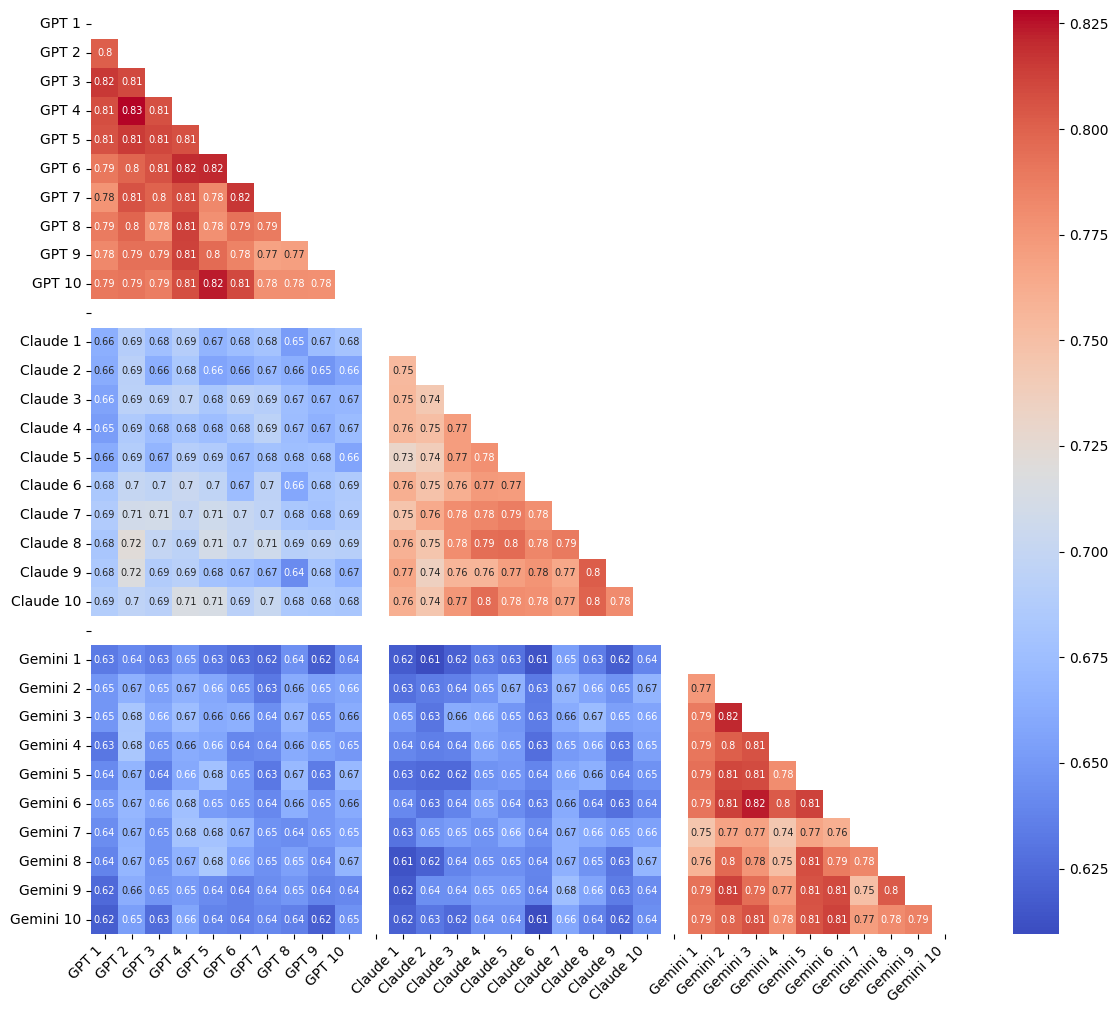

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score

data = gptls + cldls + gemls

# Initialize matrix to store Cohen's kappa scores
num_lists = len(data)
kappa_matrix = np.zeros((num_lists, num_lists))

# Calculate Cohen's kappa for each pair
for i in range(num_lists):
    for j in range(num_lists):
        kappa_matrix[i, j] = cohen_kappa_score(data[i], data[j])

# Add space between groups
group_size = len(gptls)
blank_space = 1  # Number of blank rows/columns between groups

# Create a new matrix with spaces
new_size = num_lists + 2 * blank_space  # Extra spaces for 2 gaps
kappa_matrix_with_spaces = np.full((new_size, new_size), np.nan)

# Fill the new matrix with original values
kappa_matrix_with_spaces[:group_size, :group_size] = kappa_matrix[:group_size, :group_size]
kappa_matrix_with_spaces[group_size + blank_space:group_size * 2 + blank_space, group_size + blank_space:group_size * 2 + blank_space] = \
    kappa_matrix[group_size:group_size * 2, group_size:group_size * 2]
kappa_matrix_with_spaces[group_size * 2 + 2 * blank_space:, group_size * 2 + 2 * blank_space:] = \
    kappa_matrix[group_size * 2:, group_size * 2:]

# Cross-agreement values
kappa_matrix_with_spaces[:group_size, group_size + blank_space:group_size * 2 + blank_space] = kappa_matrix[:group_size, group_size:group_size * 2]
kappa_matrix_with_spaces[:group_size, group_size * 2 + 2 * blank_space:] = kappa_matrix[:group_size, group_size * 2:]
kappa_matrix_with_spaces[group_size + blank_space:group_size * 2 + blank_space, group_size * 2 + 2 * blank_space:] = kappa_matrix[group_size:group_size * 2, group_size * 2:]
kappa_matrix_with_spaces[group_size + blank_space:group_size * 2 + blank_space, :group_size] = kappa_matrix[group_size:group_size * 2, :group_size]
kappa_matrix_with_spaces[group_size * 2 + 2 * blank_space:, :group_size] = kappa_matrix[group_size * 2:, :group_size]
kappa_matrix_with_spaces[group_size * 2 + 2 * blank_space:, group_size + blank_space:group_size * 2 + blank_space] = kappa_matrix[group_size * 2:, group_size:group_size * 2]

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(kappa_matrix_with_spaces, dtype=bool))

# Generate heatmap
plt.figure(figsize=(14, 12))

# Custom tick labels to annotate the coordinates
tick_labels = ['GPT {}'.format(i + 1) for i in range(len(gptls))] + \
              [''] * blank_space + \
              ['Claude {}'.format(i + 1) for i in range(len(cldls))] + \
              [''] * blank_space + \
              ['Gemini {}'.format(i + 1) for i in range(len(gemls))]

sns.heatmap(kappa_matrix_with_spaces, annot=True, cmap='coolwarm', xticklabels=tick_labels, yticklabels=tick_labels, annot_kws={"size": 7}, mask=mask)
# plt.title("Heatmap of Cohen's Kappa Scores")
# plt.xlabel("List Index")
# plt.ylabel("List Index")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
# plt.savefig("h.png")
plt.show()